In [1]:
%load_ext autoreload
%autoreload 2
import uproot as ur
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools")
import analysisTools as tools
from helpers import getMatches, getMatchesv2, getMatchesv2_lowPtOnly

In [6]:
t1 = tools.loadNano("regIDNoCut_Mchi-48p0_dMchi-16p0_combined_noCrossClean.root")

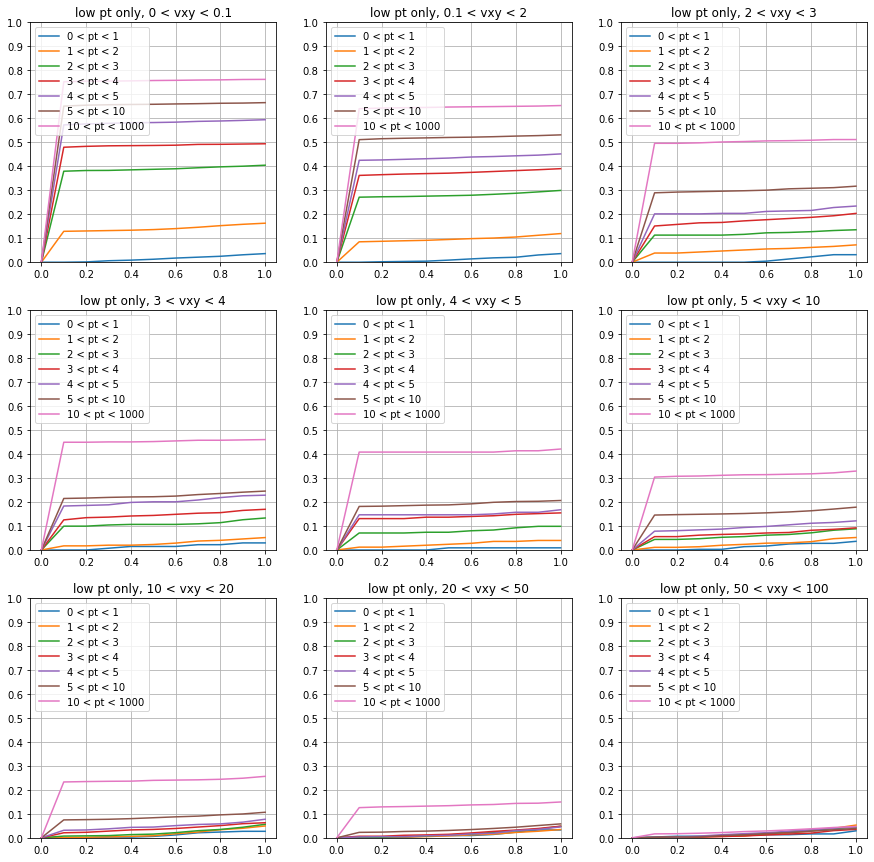

In [10]:
ie = t1.GenEleClosestLpt.ind
re = t1.GenEleClosestLpt.dr

ip = t1.GenPosClosestLpt.ind
rp = t1.GenPosClosestLpt.dr

dRcuts = np.arange(0,1.1,0.1)
vxy_bins = [0,0.1,2,3,4,5,10,20,50,100]
pt_bins = [0,1,2,3,4,5,10,1000]
plt.figure(figsize=(15,15))
for i in range(1,len(vxy_bins)):
    plt.subplot(int("33{0}".format(i)))
    v0 = vxy_bins[i-1]
    v1 = vxy_bins[i]
    for j in range(1,len(pt_bins)):
        pt0 = pt_bins[j-1]
        pt1 = pt_bins[j]
        effs = []
        effs_l = []
        effs_r = []
        effs_n = []
        for dRcut in dRcuts:
            dRecut = re < dRcut
            vxyCutE = (t1.genEE.dr > 1.0) & (t1.GenEle.vxy < v1) & (t1.GenEle.vxy > v0) & (t1.GenEle.pt > pt0) & (t1.GenEle.pt < pt1)
            dRpcut = rp < dRcut
            vxyCutP = (t1.genEE.dr > 1.0) & (t1.GenPos.vxy < v1) & (t1.GenPos.vxy > v0) & (t1.GenPos.pt > pt0) & (t1.GenPos.pt < pt1)
            num = ak.count_nonzero(dRecut & vxyCutE) + ak.count_nonzero(dRpcut & vxyCutP)
            den = ak.count_nonzero(vxyCutE) + ak.count_nonzero(vxyCutP)
            if den > 0:
                effs.append(num/den)
            else:
                effs.append(0)
        #plt.xticks(np.arange(0,1.1,0.1))
        plt.plot(dRcuts,effs,label="{0} < pt < {1}".format(pt0,pt1))
        plt.ylim([0,1])
        plt.yticks(np.arange(0,1.1,0.1))
        plt.grid()
        #plt.plot(dRcuts,effs_n,label="?")
        plt.legend(loc='upper left')
    plt.title("low pt only, {0} < vxy < {1}".format(v0,v1))

# Pt and vxy 2D

In [11]:
reco,gen = getMatchesv2_lowPtOnly(t1,dRcut=0.3)
allgen = ak.concatenate((t1.GenEle,t1.GenPos))

/tmp/ipykernel_19235/323418394.py:7: RuntimeWarning: invalid value encountered in true_divide
  h = h1 / h2


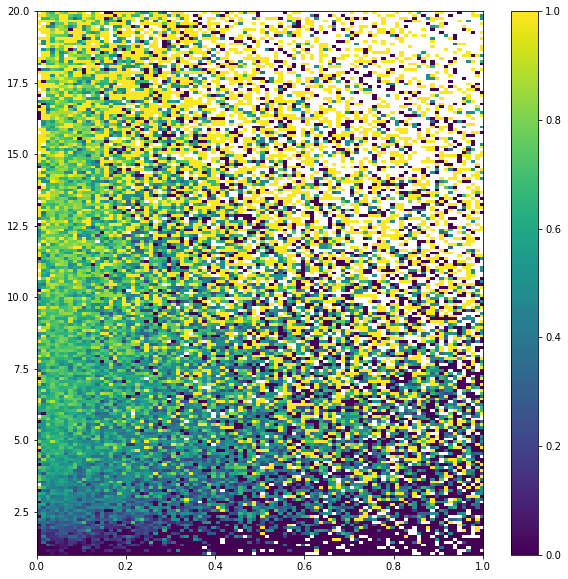

In [33]:
vxy_bins = np.arange(0,1.01,step=0.01)
pt_bins = np.arange(1,20.1,step=0.1)

plt.figure(figsize=(10,10))
h1, xedges, yedges = np.histogram2d(gen.vxy, gen.pt, bins=(vxy_bins,pt_bins))
h2, xedges, yedges = np.histogram2d(allgen.vxy, allgen.pt, bins=(vxy_bins,pt_bins))
h = h1 / h2
pc = plt.gca().pcolorfast(xedges, yedges, h.T)
plt.colorbar(pc)